# Network Analysis Fundamentals: An Analysis of a Zachary's Karate Club
> In this article we will introduce Network Analysis, and use it to study the structure and relationships within a Karate Club.
- toc: true 
- comments: true
- image: images/network.jpg
- categories: [network-analysis]

In [2]:
#hide
import csv
import matplotlib.pyplot as plt
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.

## Introduction
In this study we will introduce network analysis, and apply it to understanding the structure and functioning of a karate club.

## What is Network Analysis?
So we will define a network as a group of objects and a set of relationships between them. The mathematical term for this is a **Graph**. This could represent a range of different things, such as a [group of people](https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python), electrical circuits, the flight pattens of aeroplanes, a set of bridges or roads in a city, or biological networks.

Network Analysis helps us better understand the structure, relationships and functioning of a network.

## This Study - Zachary's karate club
[Zachary's karate club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a well known benchmark dataset in Network analysis.

The dataset is a network of friendships between the 34
members of a karate club at a US university, as described by Wayne Zachary
in 1977.  This was first used in the paper *W. W. Zachary, An
information flow model for conflict and fission in small groups, Journal of
Anthropological Research 33, 452-473 (1977)*


## Network Fundamentials
### Nodes and Edges

Before looking at our data lets first define some basic terms used to describe networks. **Nodes (also called vertices)** are the objects of the network, so in a network of people each node would represent a person. **Edges (also called links)** are the connections between nodes, so in a network of people each edge would represent a relationship or connection between two people.

![](https://github.com/pranath/blog/raw/master/images/network2.png "Network: Nodes and Edges")

Our dataset is represented as a list of nodes and a list of edges. We will use the [NetworkX](https://networkx.org) python library for dealing with networks.

Lets load our Karate dataset and print some basic stats about it.


In [3]:
# Load karate dataset
G = nx.karate_club_graph()
# Print summary
print(nx.info(G))

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


The 34 nodes represent the members of the karate club, and the edges describes which people know each other i.e. the relationships that exist between different people.

So we have some very basic information here about our Graph already, i.e. the number of nodes and edges.

### Attributes

Currently our Network is a set of people and the relationships that exist between them. But we can also add extra infromation about each person i.e. add extra information to each Node, these are called *Attributes*.

Lets see what attributes the nodes of our Karate network have.

In [4]:

# Print node attributes for all nodes
for nodex in G.nodes(data=True):  
    for b in (nodex[1]):
        print(b, " --- ")

club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 
club  --- 


So we see to have just one attribute for all our nodes called 'club'. Lets see what the values are for these for all our nodes.

In [5]:
# Print values for node attribute 'club' for all nodes
for n in G.nodes():
    print(n, G.nodes[n]['club'])

0 Mr. Hi
1 Mr. Hi
2 Mr. Hi
3 Mr. Hi
4 Mr. Hi
5 Mr. Hi
6 Mr. Hi
7 Mr. Hi
8 Mr. Hi
9 Officer
10 Mr. Hi
11 Mr. Hi
12 Mr. Hi
13 Mr. Hi
14 Officer
15 Officer
16 Mr. Hi
17 Mr. Hi
18 Officer
19 Mr. Hi
20 Officer
21 Mr. Hi
22 Officer
23 Officer
24 Officer
25 Officer
26 Officer
27 Officer
28 Officer
29 Officer
30 Officer
31 Officer
32 Officer
33 Officer


So we can see for club nodes either have a value of 'Officer' or 'Mr. Hi'. We will return to what these values mean later.

We can plot a very basic visualisation of the network using the **Matplotlib** python library.

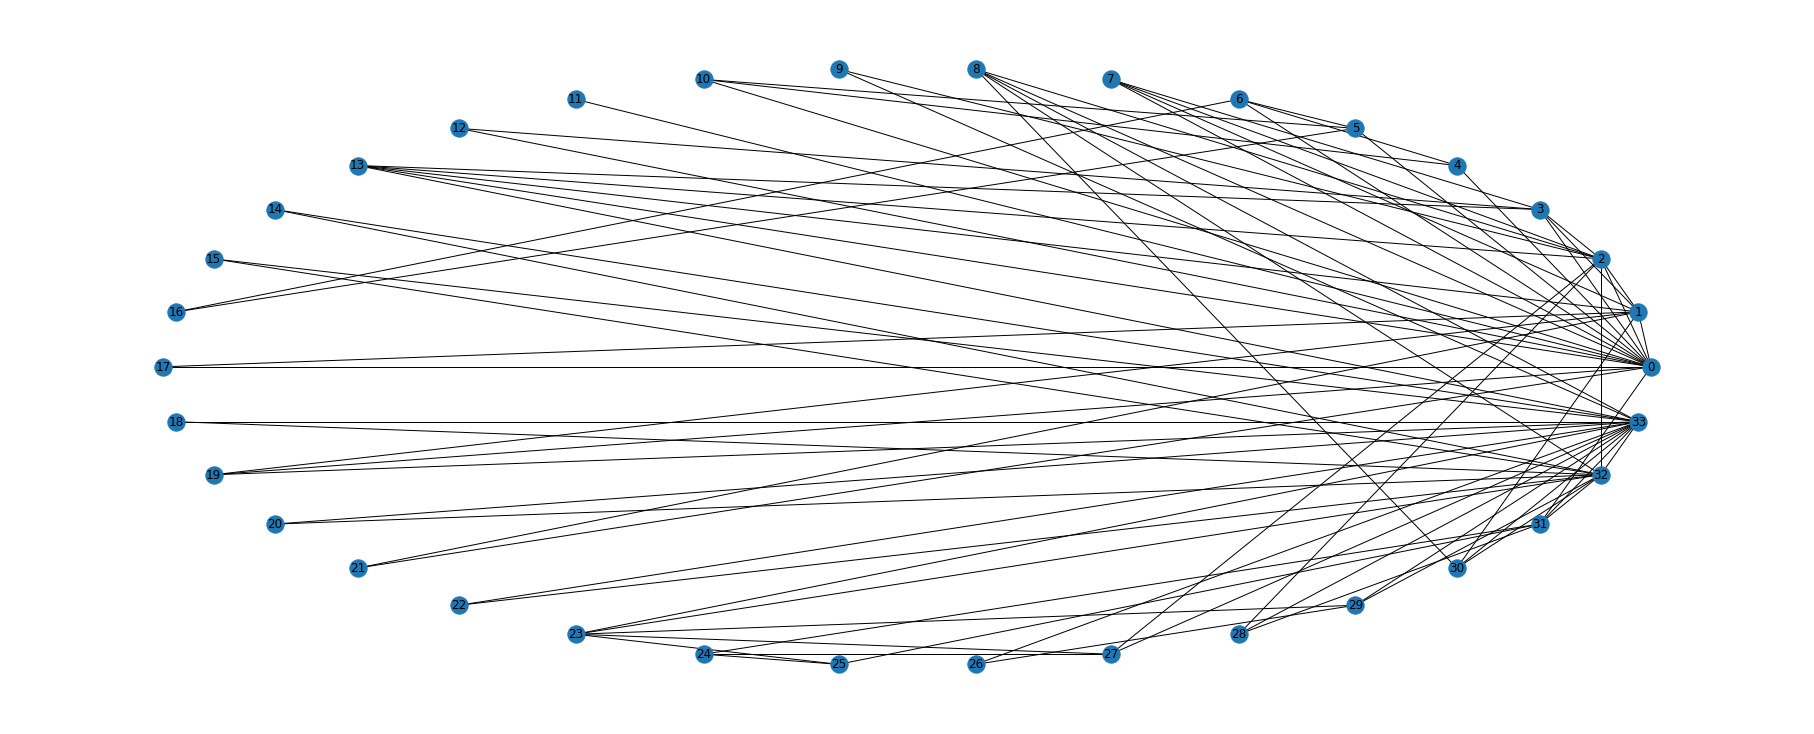

In [6]:
# Plot Network/Graph
plt.figure(figsize=(25,10))
nx.draw_circular(G,with_labels = True)

We can get a general sense that some nodes seem more connected to each other, for eample some of the nodes on the right have many more connections than most others.

Lets see if we can get more precise measurements of the properties of this network using metrics.

## Network Metrics

Metrics allow us to start going beyond just nodes and edges and starting to really understand overall features that start to describe the unique charactersitics of this particular network. 

As well as the number of nodes and edges, we also know we have one attribute for our nodes (club). We also assume in this case that these relationships are symmetrical i.e. if person A knows person B, then person B knows person A. This is not always the case, for example in a network of airline flights, just because there is a flight from city A to B, that does not always imply there is a reciprical flight from city B to A. Symmetrical relationship type graphs are known as **undirected** graphs, and non-symmetrical relationships are known as **directed** graphs.

These kind of properties such as the number of nodes and edges, available attributes, if the network is directed or not - determine the kind of things you can do with the network, including the types of analyses possible. For example, a network with too few nodes might be difficult to draw conclusions from, or an undirected network requires the appropriate usage of certain measures but not others.

For example, in our Karate dataset you can determine what communities people find themselves in, but you can’t determine the directional routes through which information might flow along the network (you’d need a directed network for that). By using the symmetric, undirected relationships in this case, you’ll be able to find sub-communities and the people who are important to those communities, a process that would be more difficult (though still possible) with a directed network. 

NetworkX allows you to perform most analyses you might conceive, but you must understand the affordances of your dataset and realize some NetworkX algorithms are more appropriate than others.

### Shape

While we got a sneak peek at the network by plotting that earlier, more complex networks can be difficult to understand by just plotting them out. Shape is a characteristic of a network we can get numerical measures for to help us understand it better in terms of overall structure for example do nodes cluster together, or are they equally spread out? Are there complex structures, or is every node arranged along a straight line?

We can plot again a basic plot of the network, but this time not in a circular layout, and lets increase the size of the nodes so we can identify each node number more clearly.

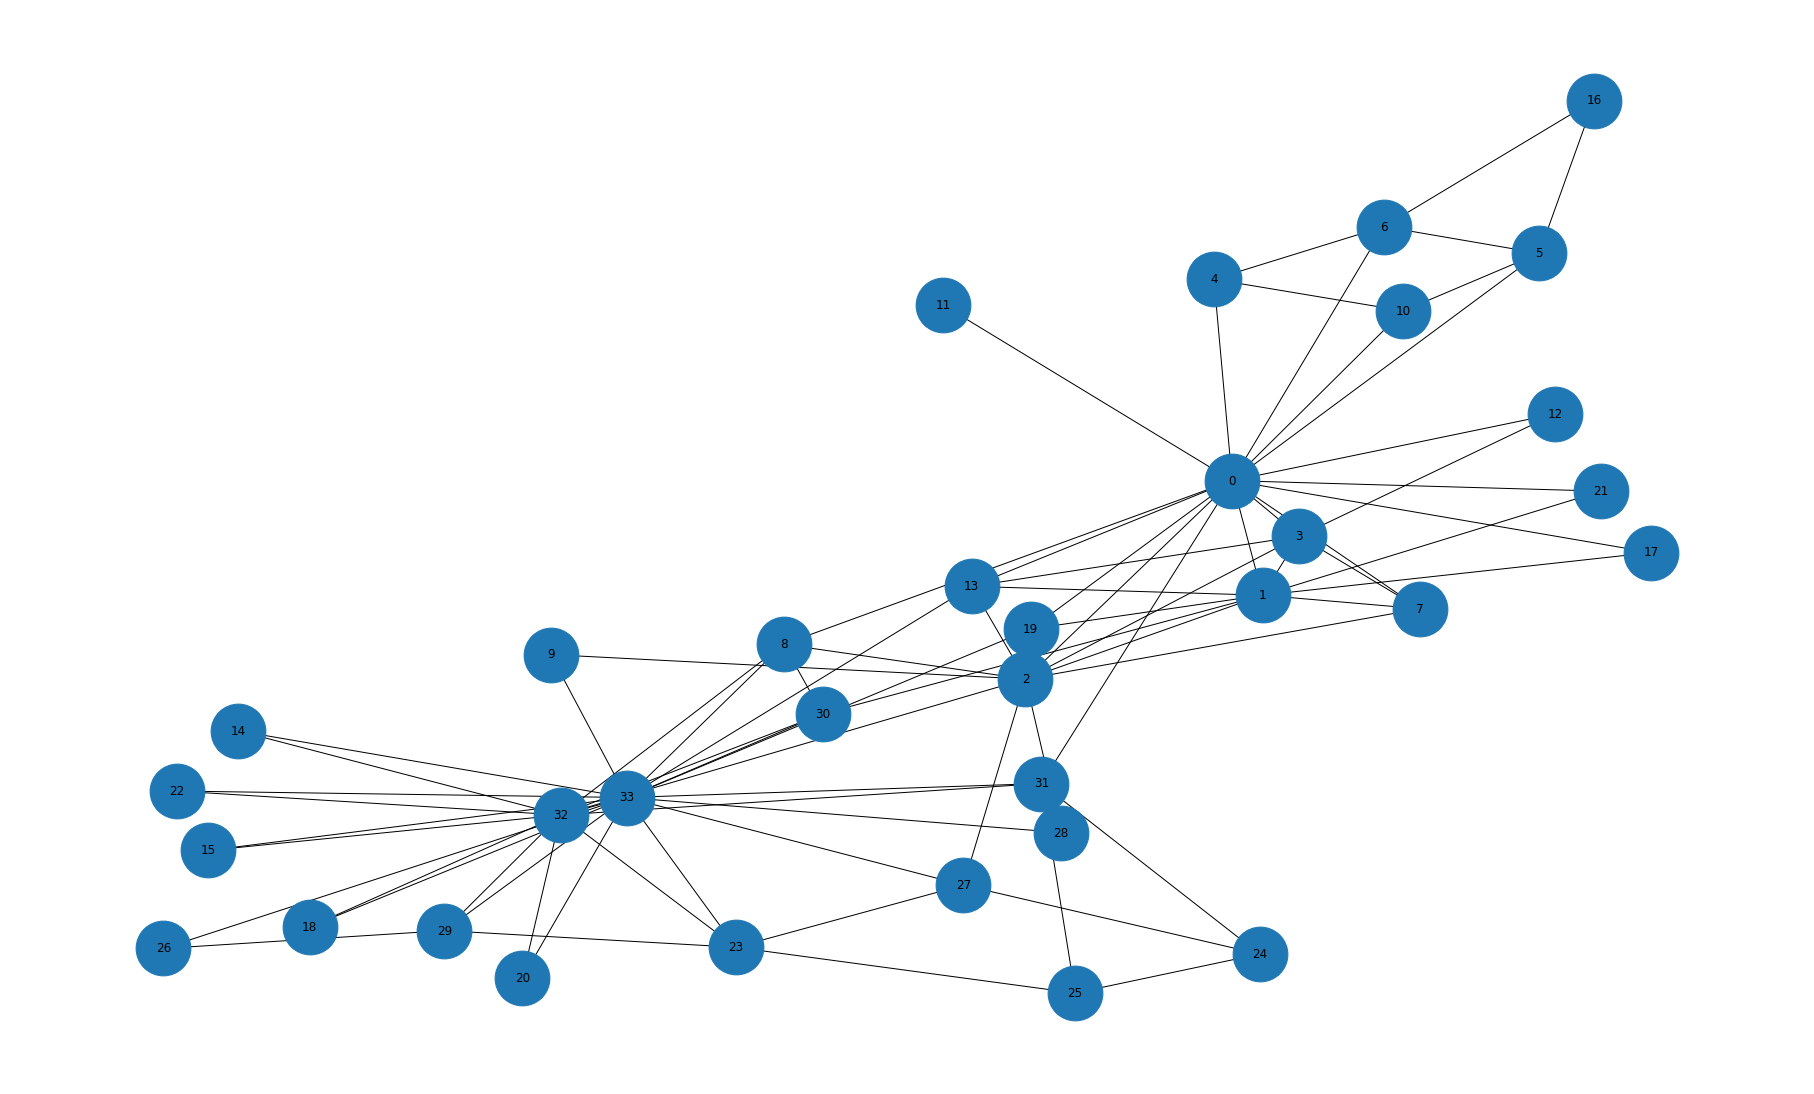

In [7]:
# Plot Network/Graph
plt.figure(figsize=(25,15))
nx.draw(G,with_labels = True, node_size=3000)

We can see that all nodes are part of one big network. Knowing how many groups or components of a network can help us focus calculations on whats most useful.

We can also observe again some nodes seem more connected than others, e.g. node 0 and node 33. Lets highlight these and plot with a circular style.

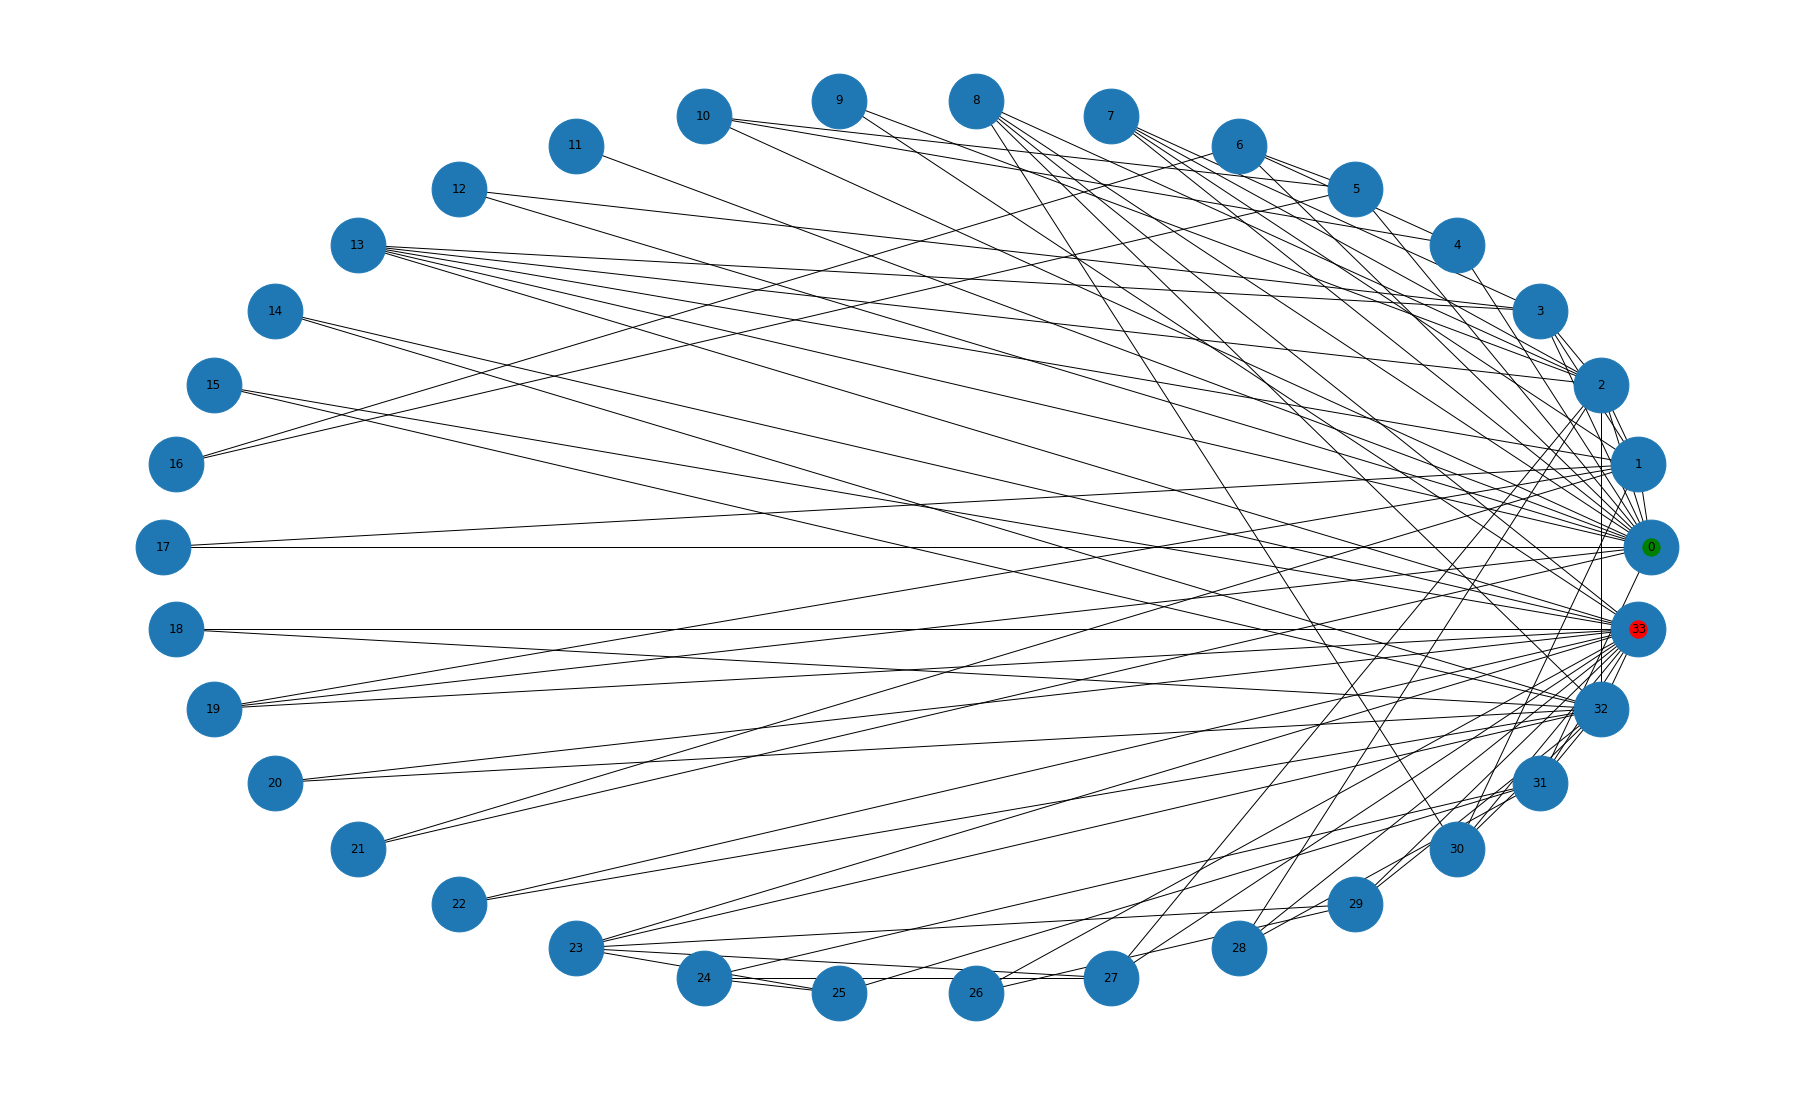

In [8]:
# Plot Network/Graph
plt.figure(figsize=(25,15))

# To plot using networkx we first need to get the positions we want for each node. 
circ_pos = nx.circular_layout(G) 

# Use the networkx draw function to easily visualise the graph
nx.draw(G,circ_pos, with_labels = True, node_size=3000)

#let's highlight two of the most connected nodes 0 and 33
nx.draw_networkx_nodes(G, circ_pos, nodelist=[0], node_color='g', alpha=1)
nx.draw_networkx_nodes(G, circ_pos, nodelist=[33], node_color='r', alpha=1)

We can now see what seem to be two of the most connected nodes highlighted in red and green.

However as mentioned earlier, a purely visual understanding of a network may not be accurate for large and complex networks, so numerical measures can be more useful and accurate. **Quantitative metrics let you differentiate networks, learn about their topologies, and turn a jumble of nodes and edges into something you can learn from.**

A good beggining metric is **density** which is a ratio of the actual edges in a network to all possible edges in a network. Density gives you a quick measure of how closely knit the network is.

In [9]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.13903743315508021


The density value is 0.139, so this implies a not very dense network (on a scale from 0-1). 

A shortest path measurement is a bit more complex. It calculates the shortest possible series of nodes and edges that stand between any two nodes, something hard to see in large network visualizations. This measure is essentially finding friends-of-friends—if my mother knows someone that I don’t, then mom is the shortest path between me and that person. The Six Degrees of Kevin Bacon game, is basically a game of finding shortest paths (with a path length of six or less) from Kevin Bacon to any other actor.

There are many network metrics derived from shortest path lengths. One such measure is **diameter**, which is the longest of all shortest paths. After calculating all shortest paths between every possible pair of nodes in the network, diameter is the length of the path between the two nodes that are furthest apart. The measure is designed to give you a sense of the network’s overall size, the distance from one end of the network to another.

Diameter uses a simple command: nx.diameter(G). However, running this command on a graph that is not full connected will give an error.

You can check this by first finding out if your Graph “is connected” (i.e. all one component) and, if not connected, finding the largest component and calculating diameter on that component alone. 

In [10]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(G))
# Calculate diameter
diameter = nx.diameter(G)
print("Network diameter:", diameter)

True
Network diameter: 5


The network diameter is 5: there is a path length of 5 between the two farthest-apart nodes in the network. Unlike density which is scaled from 0 to 1, it is difficult to know from this number alone whether 5 is a large or small diameter. For some global metrics, it can be best to compare it to networks of similar size and shape.

The final structural calculation we will make on this network concerns the concept of triadic closure. **Triadic closure** supposes that if two people know the same person, they are likely to know each other. If Fox knows both Fell and Whitehead, then Fell and Whitehead may very well know each other, completing a triangle in the visualization of three edges connecting Fox, Fell, and Whitehead. The number of these enclosed triangles in the network can be used to find clusters and communities of individuals that all know each other fairly well.

One way of measuring triadic closure is called clustering coefficient because of this clustering tendency, but the structural network measure you will learn is known as transitivity. **Transitivity** is the ratio of all triangles over all possible triangles. A possible triangle exists when one person (Fox) knows two people (Fell and Whitehead). 

So transitivity, like density, expresses how interconnected a graph is in terms of a ratio of actual over possible connections. Remember, measurements like transitivity and density concern likelihoods rather than certainties. **All the outputs of the Python script must be interpreted, like any other object of research**. Transitivity allows you a way of thinking about all the relationships in your graph that may exist but currently do not.

In [11]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.2556818181818182


Also like density, transitivity is scaled from 0 to 1, and you can see that the network’s transitivity is about 0.255, somewhat higher than its 0.139 density. Because the graph is not very dense, there are fewer possible triangles to begin with, which may result in slightly higher transitivity. That is, nodes that already have lots of connections are likely to be part of these enclosed triangles. To back this up, you’ll want to know more about nodes with many connections.

### Centrality

Now we have some measures of the overall network i.e. measures of the shape of the network, a good next step can be to identify important nodes in the network.  In network analysis, measures of the importance of nodes are referred to as centrality measures. Because there are many ways of approaching the question “Which nodes are the most important?” there are many different ways of calculating centrality. 

**Degree** is the simplest and the most common way of finding important nodes. A node’s degree is the sum of its edges. If a node has three lines extending from it to other nodes, its degree is three. Five edges, its degree is five. It’s really that simple. Since each of those edges will always have a node on the other end, you might think of degree as the number of people to which a given person is directly connected. The nodes with the highest degree in a social network are the people who know the most people. These nodes are often referred to as hubs, and calculating degree is the quickest way of identifying hubs.

In [12]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [13]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
(33, 17)
(0, 16)
(32, 12)
(2, 10)
(1, 9)
(3, 6)
(31, 6)
(8, 5)
(13, 5)
(23, 5)
(5, 4)
(6, 4)
(7, 4)
(27, 4)
(29, 4)
(30, 4)
(4, 3)
(10, 3)
(19, 3)
(24, 3)


Degree can tell you about the biggest hubs, but it can’t tell you that much about the rest of the nodes. And in many cases, those hubs it’s telling you about. We can see here for example this confirms our earlier intuition that nodes 33 and 0 are two of the most connected people, two of the biggest hubs.

Thankfully there are other centrality measures that can tell you about more than just hubs. **Eigenvector centrality** is a kind of extension of degree—it looks at a combination of a node’s edges and the edges of that node’s neighbors. Eigenvector centrality cares if you are a hub, but it also cares how many hubs you are connected to. It’s calculated as a value from 0 to 1: the closer to one, the greater the centrality. Eigenvector centrality is useful for understanding which nodes can get information to many other nodes quickly. If you know a lot of well-connected people, you could spread a message very efficiently. If you’ve used Google, then you’re already somewhat familiar with Eigenvector centrality. Their PageRank algorithm uses an extension of this formula to decide which webpages get to the top of its search results.

**Betweenness centrality** is a bit different from the other two measures in that it doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality looks at all the shortest paths that pass through a particular node (see above). To do this, it must first calculate every possible shortest path in your network, so keep in mind that betweenness centrality will take longer to calculate than other centrality measures (but it won’t be an issue in a dataset of this size). Betweenness centrality, which is also expressed on a scale of 0 to 1, is fairly good at finding nodes that connect two otherwise disparate parts of a network. If you’re the only thing connecting two clusters, every communication between those clusters has to pass through you. In contrast to a hub, this sort of node is often referred to as a broker. Betweenness centrality is not the only way of finding brokerage (and other methods are more systematic), but it’s a quick way of giving you a sense of which nodes are important not because they have lots of connections themselves but because they stand between groups, giving the network connectivity and cohesion.

These two centrality measures are even simpler to run than degree—they don’t need to be fed a list of nodes, just the graph G. You can run them with these functions:

In [14]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
(0, 0.43763528138528146)
(33, 0.30407497594997596)
(32, 0.145247113997114)
(2, 0.14365680615680618)
(31, 0.13827561327561325)
(8, 0.05592682780182781)
(1, 0.053936688311688304)
(13, 0.04586339586339586)
(19, 0.03247504810004811)
(5, 0.02998737373737374)
(6, 0.029987373737373736)
(27, 0.02233345358345358)
(23, 0.017613636363636363)
(30, 0.014411976911976909)
(3, 0.011909271284271283)
(25, 0.0038404882154882154)
(29, 0.0029220779220779218)
(24, 0.0022095959595959595)
(28, 0.0017947330447330447)
(9, 0.0008477633477633478)


Interestingly, nodes 33 and 0 again come up top for betweeness centrality as well. Lets rank everyone and show betweeness and degree together.

In [15]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Person:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Person: 0 | Betweenness Centrality: 0.43763528138528146 | Degree: 16
Person: 33 | Betweenness Centrality: 0.30407497594997596 | Degree: 17
Person: 32 | Betweenness Centrality: 0.145247113997114 | Degree: 12
Person: 2 | Betweenness Centrality: 0.14365680615680618 | Degree: 10
Person: 31 | Betweenness Centrality: 0.13827561327561325 | Degree: 6
Person: 8 | Betweenness Centrality: 0.05592682780182781 | Degree: 5
Person: 1 | Betweenness Centrality: 0.053936688311688304 | Degree: 9
Person: 13 | Betweenness Centrality: 0.04586339586339586 | Degree: 5
Person: 19 | Betweenness Centrality: 0.03247504810004811 | Degree: 3
Person: 5 | Betweenness Centrality: 0.02998737373737374 | Degree: 4
Person: 6 | Betweenness Centrality: 0.029987373737373736 | Degree: 4
Person: 27 | Betweenness Centrality: 0.02233345358345358 | Degree: 4
Person: 23 | Betweenness Centrality: 0.017613636363636363 | Degree: 5
Person: 30 | Betweenness Centrality: 0.014411976911976909 | Degree: 4
Person: 3 | Betweenness Centrality

This seems to confirm the importance of nodes 0 and 33, as both have the highest betweeness centrality and degree.

## Community Detection

Another common thing to ask about a network dataset is what the subgroups or communities are within the larger social structure. Is your network one big, happy family where everyone knows everyone else? Or is it a collection of smaller subgroups that are only connected by one or two intermediaries? The field of community detection in networks is designed to answer these questions. There are many ways of calculating communities, cliques, and clusters in your network, but the most popular method currently is modularity. **Modularity** is a measure of relative density in your network: a community (called a module or modularity class) has high density relative to other nodes within its module but low density with those outside. Modularity gives you an overall score of how fractious your network is, and that score can be used to partition the network and return the individual communities.

Very dense networks are often more difficult to split into sensible partitions. Luckily, as you discovered earlier, this network is not all that dense. There aren’t nearly as many actual connections as possible connections. Its worthwhile partitioning this sparse network with modularity and seeing if the result make analytical sense.

In [16]:
communities = community.greedy_modularity_communities(G)

modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

The method *greedy_modularity_communities()* tries to determine the number of communities appropriate for the graph, and groups all nodes into subsets based on these communities. Unlike the centrality functions, the above code will not create a dictionary. Instead it creates a list of special “frozenset” objects (similar to lists). There’s one set for each group, and the sets contain the node number of the people in each group. In order to add this information to your network in the now-familiar way, you must first create a dictionary that labels each person with a number value for the group to which they belong.

As always, you can combine these measures with others. For example, here’s how you find the highest eigenvector centrality nodes in modularity class 0 (the first one):

In [17]:
# First get a list of just the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Person:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 0 Sorted by Eigenvector Centrality:
Person: 33 | Eigenvector Centrality: 0.373371213013235
Person: 32 | Eigenvector Centrality: 0.3086510477336959
Person: 8 | Eigenvector Centrality: 0.2274050914716605
Person: 31 | Eigenvector Centrality: 0.19103626979791702
Person: 30 | Eigenvector Centrality: 0.17476027834493085


Using eigenvector centrality as a ranking can give you a sense of the important people within this modularity class, so for example in this class we can see person 33 again has the highest eigenvector centrality and so this person is likely an important person within this group.

In smaller networks like this one, a common task is to find and list all of the modularity classes and their members. You can do this by looping through the communities list:

In [18]:
for i,c in enumerate(communities): # Loop through the list of communities
  print('Class '+str(i)+':', list(c)) # Print out the classes and their members

Class 0: [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Class 1: [1, 2, 3, 7, 9, 12, 13, 17, 21]
Class 2: [0, 16, 19, 4, 5, 6, 10, 11]


So we seem to have 3 groups, lets see who the most important people within each of these groups are.

In [24]:
for modularity_class in range(3):
  # First get a list of just the nodes in that class
  classN = [n for n in G.nodes() if G.nodes[n]['modularity'] == modularity_class]

  # Then create a dictionary of the eigenvector centralities of those nodes
  class_eigenvector = {n:G.nodes[n]['eigenvector'] for n in classN}

  # Then sort that dictionary and print the first 5 results
  class_sorted_by_eigenvector = sorted(class_eigenvector.items(), key=itemgetter(1), reverse=True)

  print('  ')
  print("Modularity Class " + str(modularity_class) + " Sorted by Eigenvector Centrality:")
  for node in class_sorted_by_eigenvector[:5]:
    print("Person:", node[0], "| Eigenvector Centrality:", node[1])

  
Modularity Class 0 Sorted by Eigenvector Centrality:
Person: 33 | Eigenvector Centrality: 0.373371213013235
Person: 32 | Eigenvector Centrality: 0.3086510477336959
Person: 8 | Eigenvector Centrality: 0.2274050914716605
Person: 31 | Eigenvector Centrality: 0.19103626979791702
Person: 30 | Eigenvector Centrality: 0.17476027834493085
  
Modularity Class 1 Sorted by Eigenvector Centrality:
Person: 2 | Eigenvector Centrality: 0.31718938996844476
Person: 1 | Eigenvector Centrality: 0.2659538704545025
Person: 13 | Eigenvector Centrality: 0.22646969838808148
Person: 3 | Eigenvector Centrality: 0.2111740783205706
Person: 7 | Eigenvector Centrality: 0.17095511498035434
  
Modularity Class 2 Sorted by Eigenvector Centrality:
Person: 0 | Eigenvector Centrality: 0.3554834941851943
Person: 19 | Eigenvector Centrality: 0.14791134007618667
Person: 5 | Eigenvector Centrality: 0.07948057788594247
Person: 6 | Eigenvector Centrality: 0.07948057788594247
Person: 4 | Eigenvector Centrality: 0.07596645881

So we seem to have 3 communities, with persons 33, 2 and 0 being the most important members of their communities.

## Summary of initial findings

Having processed and reviewed an array of network metrics in Python, we now have evidence from which arguments can be made and conclusions drawn about this network of people in the Karate club. 

We know, for example, that the network has relatively **low density**, suggesting loose associations and/or incomplete original data. We know that the community is organized around several disproportionately large **hubs**, in particular persons 0 and 33. 

Finally we learned that the network is made of 3 distinct **communities**. 

Each of these findings is an invitation to more research rather than an endpoint or proof. Network analysis is a set of tools for asking targeted questions about the structure of relationships within a dataset, and NetworkX provides a relatively simple interface to many of the common techniques and metrics. Networks are a useful way of extending your research into a group by providing information about community structure.

## Validation against ground truth

For this network beyond the data, we actually have other information to give us insight into the nature of relations at this karate club from [Zachary's research paper](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. 

In our dataset person 0 is Mr Hi, and person 33 is John A. Also the network node attribute 'club' highlighted earlier, corresponds to the final faction each member of the club ended up becoming a member of e.g. Mr Hi is 'Mr Hi', and John A is 'Officer'.

So does our network and analysis support this ground truth? Certainly our analysis has correctly identified Mr Hi and John A as key players in this group, indeed central hubs. Lets see how the idenfified 3 communities relate to each faction.

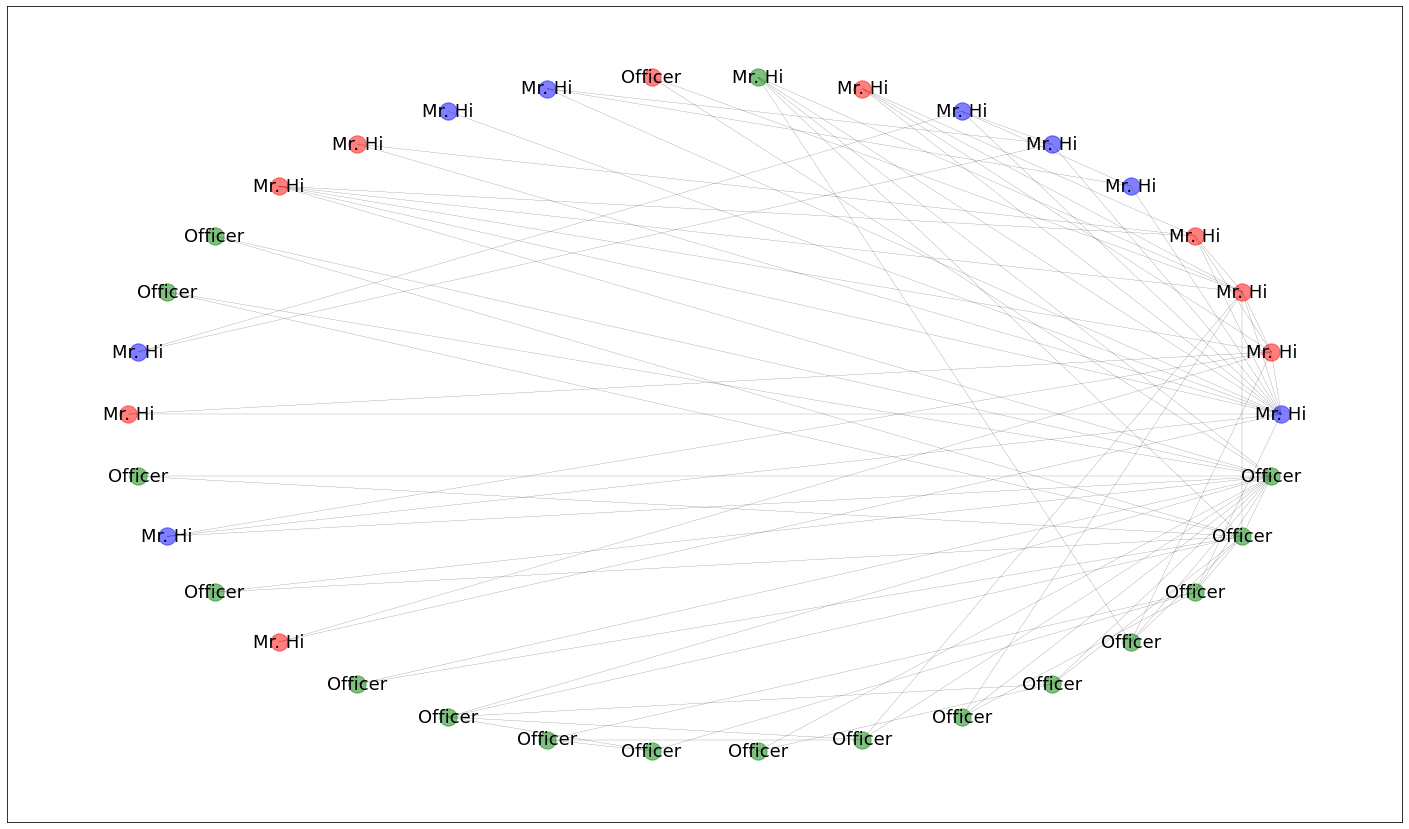

In [33]:
plt.figure(figsize=(25,15))

# Define communities
community_0 = sorted(communities[0])
community_1 = sorted(communities[1])
community_2 = sorted(communities[2])

#Let's display the labels of which club each member ended up joining
club_labels = nx.get_node_attributes(G,'club')

# draw each set of nodes in a seperate colour
nx.draw_networkx_nodes(G,circ_pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(G,circ_pos, nodelist=community_1, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(G,circ_pos, nodelist=community_2, node_color='b', alpha=0.5)

# now we can add edges to the drawing 
nx.draw_networkx_edges(G,circ_pos, style='dashed',width = 0.2)

# finally we can add labels to each node corresponding to the final club each member joined 
nx.draw_networkx_labels(G,circ_pos,club_labels,font_size=18)

plt.show()

So here, the colour represents the predicted community from our network analysis, and the text label represents the ground truth actual faction each person joined that we know. 

Firstly we can see a strong relationship between the green community and the Officer (John A) faction, in fact its almost a perfect match bar once exception at the top where one green node ends up in Mr Hi faction. Both blue and red communities seem to match perfectly with Mr Hi's faction. Lets merge the blue comminity into the red one together to see this more clearly.

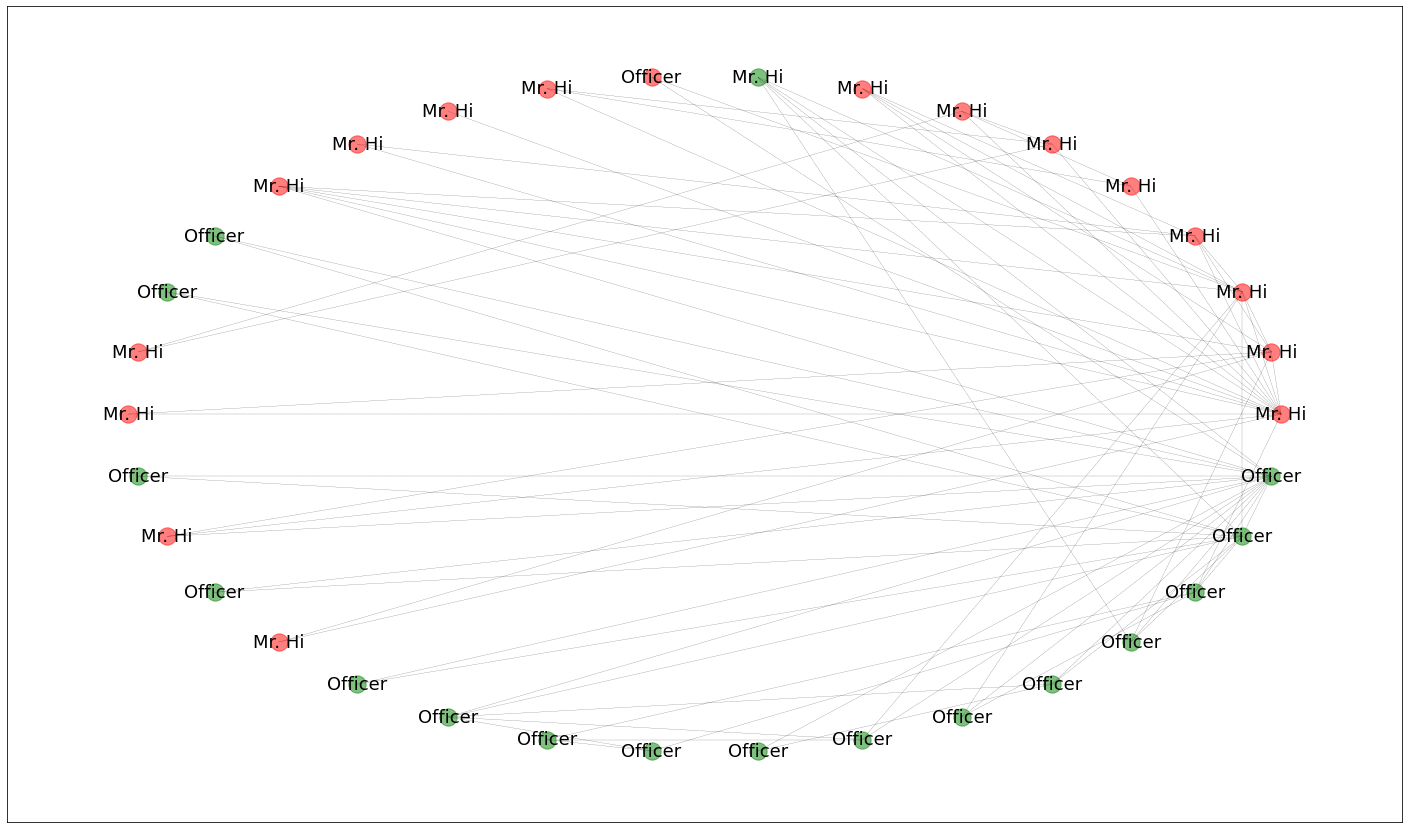

In [34]:
plt.figure(figsize=(25,15))

combined_community = community_1 + community_2

# draw each set of nodes in a seperate colour
nx.draw_networkx_nodes(G,circ_pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(G,circ_pos, nodelist=combined_community, node_color='r', alpha=0.5)

# now we can add edges to the drawing 
nx.draw_networkx_edges(G,circ_pos, style='dashed',width = 0.2)

# finally we can add labels to each node corresponding to the final club each member joined 
nx.draw_networkx_labels(G,circ_pos,club_labels,font_size=18)

plt.show()

So firstly we might conclude that Mr Hi's faction might consist of 2 sub-communites. Secondly, that our analysis predicts the actual factions very well making only one mistake, so with an accuracy of around 94%, based on the data of assocations within the club alone.

## Conclusion

This study demonstrates the potential power of network analysis to understand real life networks and how they function. The idea that we can develop a mathmatical framework that can predict an individuals choices based off of their relationships with others is immensely powerful. We live in an interconnected world and the study of networks allows us to explore those connections.

Each of these findings is an invitation to more research rather than an endpoint or proof. Network analysis is a set of tools for asking targeted questions about the structure of relationships within a dataset, and NetworkX provides a relatively simple interface to many of the common techniques and metrics. Networks are a useful way of extending your research into a group by providing information about community structure.